In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

1. Data Collection & Exploration

In [34]:
data_train_path = '../Fruits_Vegetables/train'
data_test_path = '../Fruits_Vegetables/test'
data_validation_path = '../Fruits_Vegetables/validation'

In [35]:
img_width = 180
img_height = 180
#Using TensorFlow's `image_dataset_from_directory` function to create a dataset of images for training a machine learning model. 
data_train  = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size = (img_width,img_height),
    batch_size = 32,
    validation_split = False 
)

Found 3115 files belonging to 36 classes.


In [36]:
data_category = data_train.class_names
data_category
#These are the classes to which the images belong.

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [37]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_validation_path,
    shuffle = False,
    image_size = (img_width,img_height),
    batch_size = 32,
    validation_split = False 
    )

Found 351 files belonging to 36 classes.


In [38]:
data_test  =tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle = False,
    image_size = (img_width,img_height),
    batch_size = 32,
    validation_split = False
)

Found 359 files belonging to 36 classes.


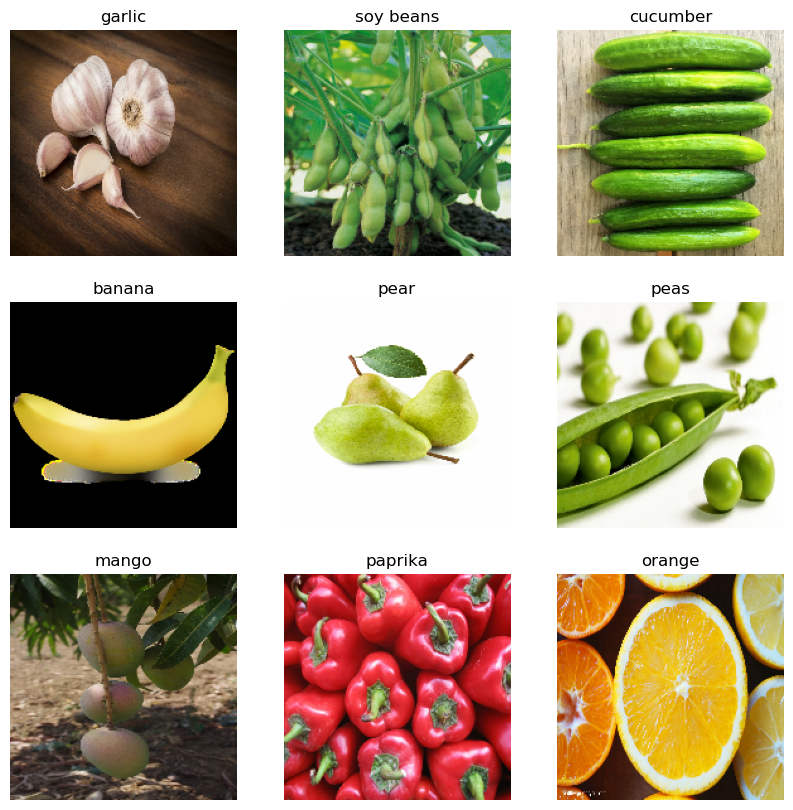

In [39]:
#Iterates through the first batch of images and label in the `data_train` dataset. For each image in the batch, plot a 3x3 grid of subplots and display the image along with its corresponding label from the `data_category` dictionary. The images are converted to numpy arrays and displayed as uint8 data type.
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_category[labels[i]])
        plt.axis('off')

In [40]:
from tensorflow.keras.models import Sequential

In [41]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

2. Data preprocessing

In [61]:
rescale = Sequential([
    layers.Rescaling(1./255),
    layers.RandomFlip("horizontal_and_vertical")
    #layers.RandomRotation(0.2)
])


3. Model Development & Optimization

In [63]:
model = Sequential([
    rescale,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_category))
])

In [64]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [65]:
epochs_size = 25
history = model.fit(data_train,validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 368ms/step - accuracy: 0.1172 - loss: 3.2024 - val_accuracy: 0.2450 - val_loss: 2.5735
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 39s 389ms/step - accuracy: 0.2636 - loss: 2.5420 - val_accuracy: 0.3647 - val_loss: 2.0891
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 39s 390ms/step - accuracy: 0.3525 - loss: 2.2302 - val_accuracy: 0.5641 - val_loss: 1.5413
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 39s 383ms/step - accuracy: 0.4353 - loss: 1.9018 - val_accuracy: 0.6467 - val_loss: 1.2715
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 413ms/step - accuracy: 0.5197 - loss: 1.6603 - val_accuracy: 0.7407 - val_loss: 1.0209
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 380ms/step - accuracy: 0.6035 - loss: 1.3563 - val_accuracy: 0.8034 - val_loss: 0.7625
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 382ms/step - accuracy: 0.6864 - loss: 1.0710 - val_accuracy: 0.8405 - val_loss: 0.6359
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 39s 389ms/step - accuracy: 0.7480 - loss: 0.8544 - val_accu

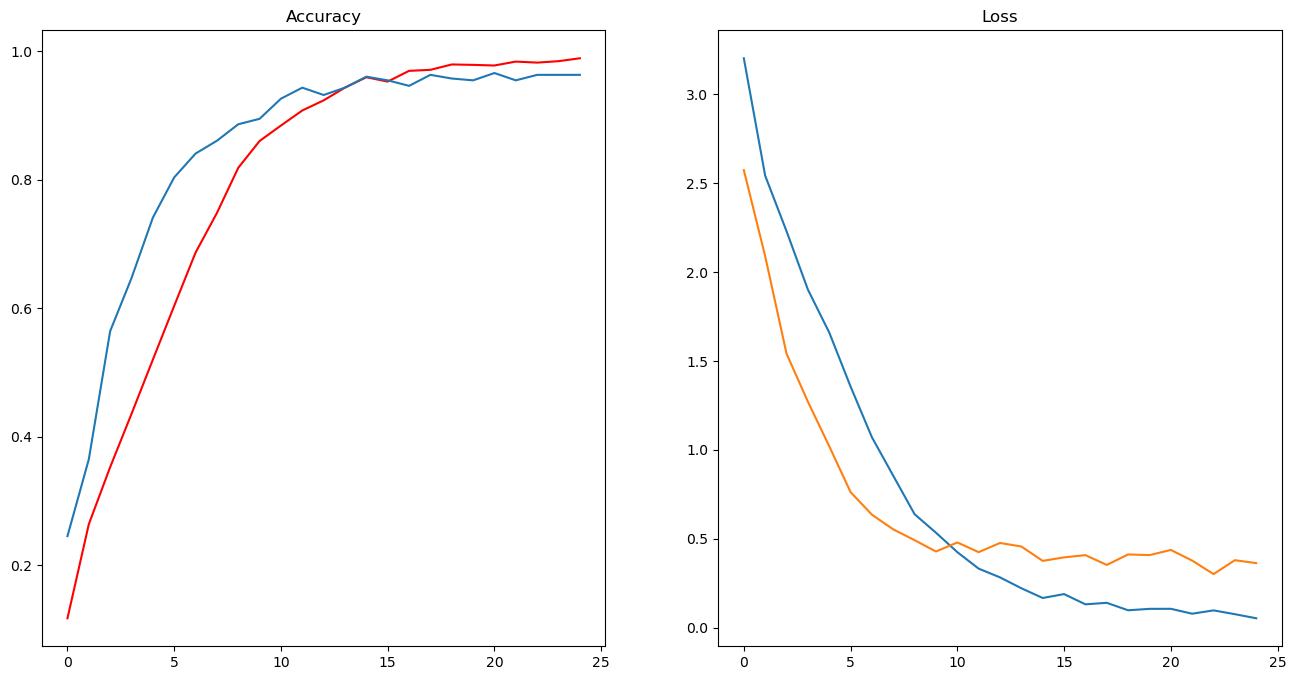

In [66]:
epochs_range = range(epochs_size)
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy',color='red')
plt.plot(epochs_range,history.history['val_accuracy'],label="Validation Accuracy")
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training Loss')
plt.plot(epochs_range,history.history['val_loss'],label="Validation Loss")
plt.title('Loss')
plt.show()


Testing

In [67]:
image = 'Image_6.JPG'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [68]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


In [69]:
score = tf.nn.softmax(predict)
print('The image is {} with accuracy of {:0.2f}'.format(data_category[np.argmax(score)],np.max(score)*100))

The image is apple with accuracy of 99.94


Model Deployment


In [70]:
model.save('Image_classifier.keras')